# <center> <h1> 📉 🧑‍💻 📉

# <center> <h1> Gradient boosting

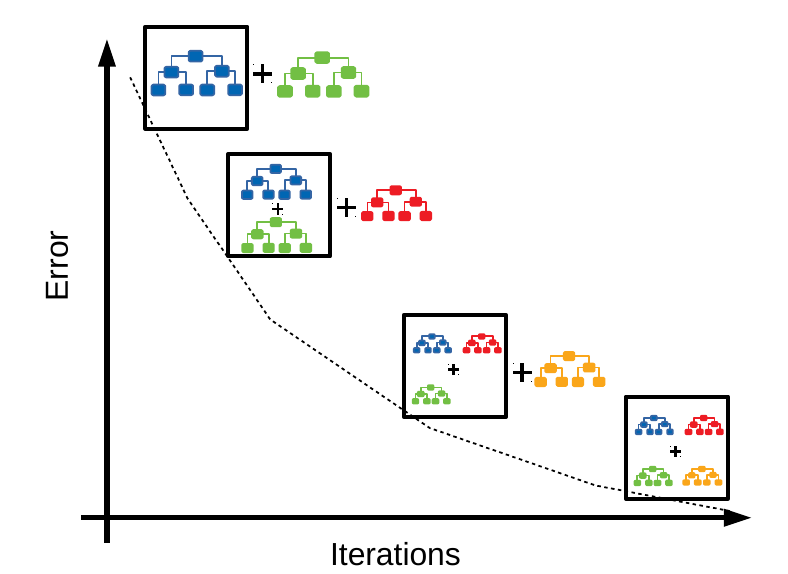

### <center> Gradient boosting is an advanced machine learning algorithm for solving classification and regression problems. It creates a forecast as an ensemble of weakly predictive models.

What does this mean? ` means we end up building a much more efficient model from a few weak ones. ` The general idea of the algorithm is to successively apply predictions in such a way that each subsequent model minimizes the error of the previous one.

`Gradient boosting works through Decision tree. ` That is, every iteration Decision Tree is created and predicted. The predictions in each iteration had a different effect on the overall prediction, simply put, the first tree has more votes than the last tree.

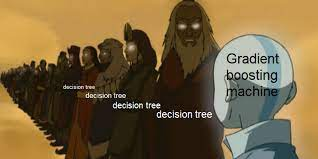

The goal of any learning algorithm is to determine the loss function and minimize it.
`Even in gradient boosting, the value of the loss function decreases after prediction in each iteration.`

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv("Datasets/datat.csv")
data

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [3]:
# we took only 3 columns for convenience
x = data[["Volume","Weight"]].to_numpy()
y = data["CO2"].to_numpy()


In [4]:
x

array([[1000,  790],
       [1200, 1160],
       [1000,  929],
       [ 900,  865],
       [1500, 1140],
       [1000,  929],
       [1400, 1109],
       [1500, 1365],
       [1500, 1112],
       [1600, 1150],
       [1100,  980],
       [1300,  990],
       [1000, 1112],
       [1600, 1252],
       [1600, 1326],
       [1600, 1330],
       [1600, 1365],
       [2200, 1280],
       [1600, 1119],
       [2000, 1328],
       [1600, 1584],
       [2000, 1428],
       [2100, 1365],
       [1600, 1415],
       [2000, 1415],
       [1500, 1465],
       [2000, 1490],
       [2000, 1725],
       [1600, 1523],
       [2000, 1705],
       [2100, 1605],
       [2000, 1746],
       [1600, 1235],
       [1600, 1390],
       [1600, 1405],
       [2500, 1395]], dtype=int64)

In [5]:
y

array([ 99,  95,  95,  90, 105, 105,  90,  92,  98,  99,  99, 101,  99,
        94,  97,  97,  99, 104, 104, 105,  94,  99,  99,  99,  99, 102,
       104, 114, 109, 114, 115, 117, 104, 108, 109, 120], dtype=int64)

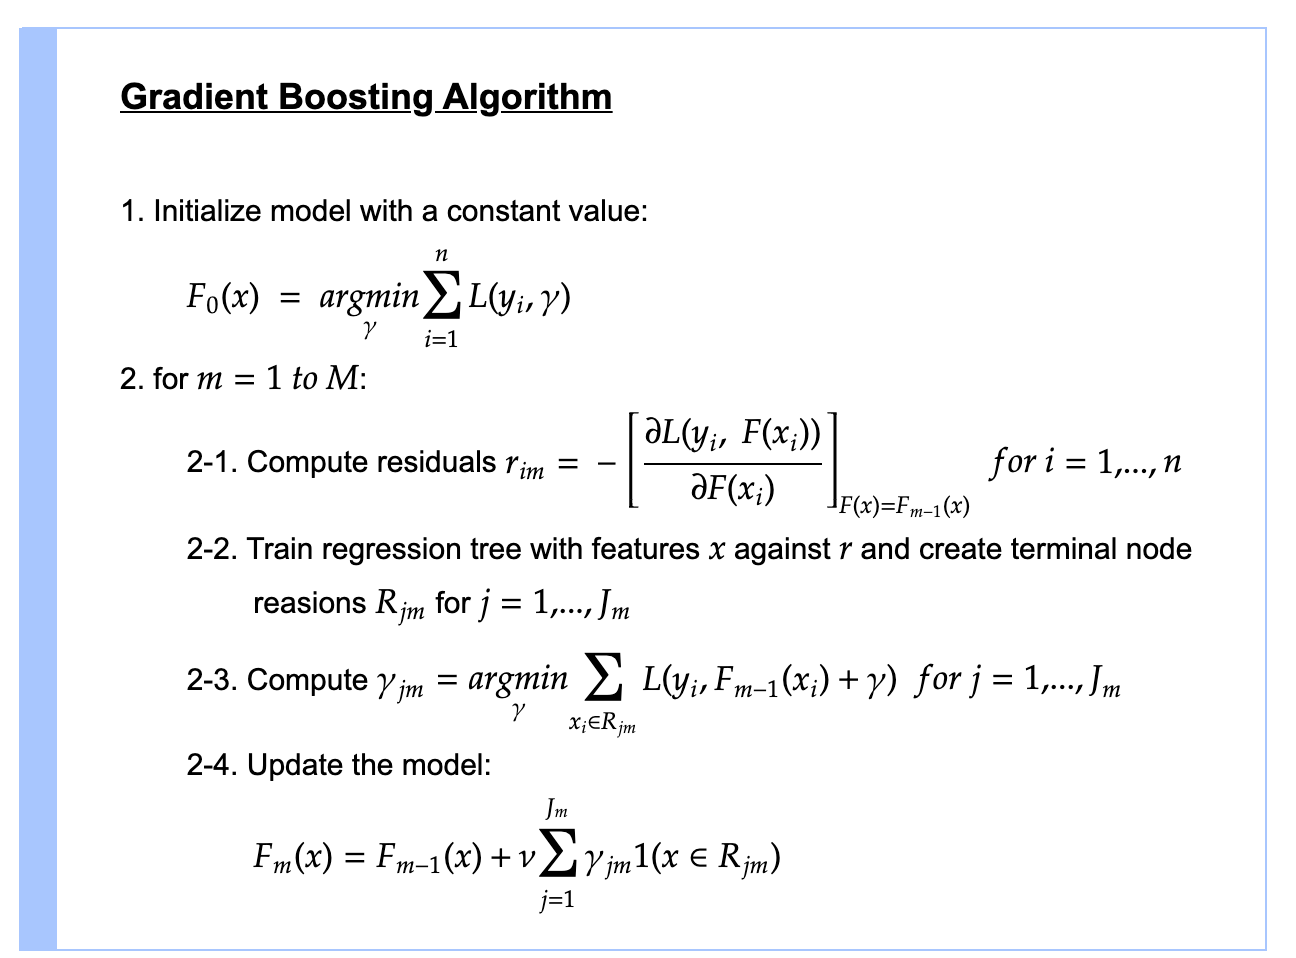

# Step - 1

In [6]:
y_mean = y.mean()
y_mean

102.02777777777777

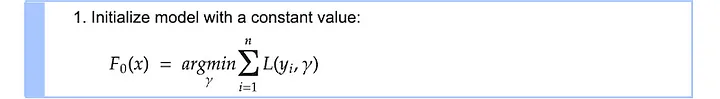

Why are we taking the average of y values for the initial value? We use root mean square error in the loss function.

argmin tells us that we are looking for the value of γ that minimizes ΣL(yᵢ,γ. We calculate the value of γ using the loss function. To find γ that minimizes ΣL, we take the derivative of ΣL with respect to γ.

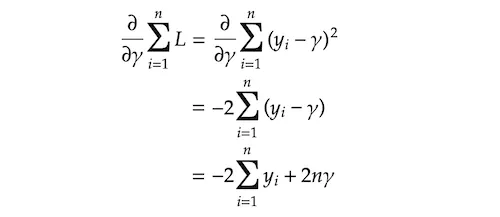

And we find γ that makes ∂ΣL/∂γ equal to 0.

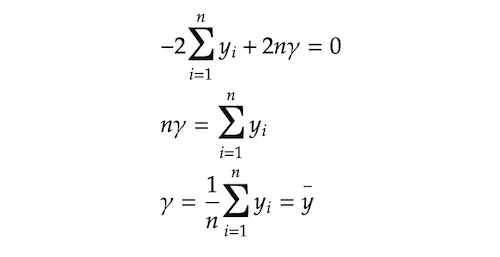

It turns out that the value of γ that minimizes ΣL is the average value of y. Therefore, we used the mean of y for our initial prediction of F₀.

In [7]:
f0 = y_mean
f0

102.02777777777777

In [8]:
fm = f0
fm

102.02777777777777

# Step - 2.1

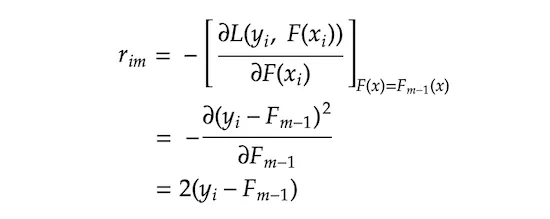

We can remove 2 from the above formula because it is a constant.

In [9]:
r = y - fm
r

array([ -3.02777778,  -7.02777778,  -7.02777778, -12.02777778,
         2.97222222,   2.97222222, -12.02777778, -10.02777778,
        -4.02777778,  -3.02777778,  -3.02777778,  -1.02777778,
        -3.02777778,  -8.02777778,  -5.02777778,  -5.02777778,
        -3.02777778,   1.97222222,   1.97222222,   2.97222222,
        -8.02777778,  -3.02777778,  -3.02777778,  -3.02777778,
        -3.02777778,  -0.02777778,   1.97222222,  11.97222222,
         6.97222222,  11.97222222,  12.97222222,  14.97222222,
         1.97222222,   5.97222222,   6.97222222,  17.97222222])

# Step - 2.2
We create and fit a decision tree

In [10]:
tree1 = DecisionTreeRegressor(max_depth=1)

In [11]:
tree1.fit(x, r)

DecisionTreeRegressor(max_depth=1)

# Step - 2.3

Bashorat qilamiz va gamma o'zgaruvchiga yuklab olamiz

In [12]:
gamma = tree1.predict(x)
gamma

array([-1.62152778, -1.62152778, -1.62152778, -1.62152778, -1.62152778,
       -1.62152778, -1.62152778, -1.62152778, -1.62152778, -1.62152778,
       -1.62152778, -1.62152778, -1.62152778, -1.62152778, -1.62152778,
       -1.62152778, -1.62152778, -1.62152778, -1.62152778, -1.62152778,
       -1.62152778, -1.62152778, -1.62152778, -1.62152778, -1.62152778,
       -1.62152778, -1.62152778, 12.97222222, -1.62152778, 12.97222222,
       12.97222222, 12.97222222, -1.62152778, -1.62152778, -1.62152778,
       -1.62152778])

# Step - 2.4
At the end we update Fm

In [13]:
fm += 0.1*gamma
fm

array([101.865625, 101.865625, 101.865625, 101.865625, 101.865625,
       101.865625, 101.865625, 101.865625, 101.865625, 101.865625,
       101.865625, 101.865625, 101.865625, 101.865625, 101.865625,
       101.865625, 101.865625, 101.865625, 101.865625, 101.865625,
       101.865625, 101.865625, 101.865625, 101.865625, 101.865625,
       101.865625, 101.865625, 103.325   , 101.865625, 103.325   ,
       103.325   , 103.325   , 101.865625, 101.865625, 101.865625,
       101.865625])

In [14]:
loss1 = (y-fm)**2
loss1

array([8.21180664e+00, 4.71368066e+01, 4.71368066e+01, 1.40793057e+02,
       9.82430664e+00, 9.82430664e+00, 1.40793057e+02, 9.73305566e+01,
       1.49430566e+01, 8.21180664e+00, 8.21180664e+00, 7.49306641e-01,
       8.21180664e+00, 6.18680566e+01, 2.36743066e+01, 2.36743066e+01,
       8.21180664e+00, 4.55555664e+00, 4.55555664e+00, 9.82430664e+00,
       6.18680566e+01, 8.21180664e+00, 8.21180664e+00, 8.21180664e+00,
       8.21180664e+00, 1.80566406e-02, 4.55555664e+00, 1.13955625e+02,
       5.08993066e+01, 1.13955625e+02, 1.36305625e+02, 1.87005625e+02,
       4.55555664e+00, 3.76305566e+01, 5.08993066e+01, 3.28855557e+02])

In [15]:
# We see the value of the loss function after the 1st iteration
loss1.sum() / len(x)

50.030390625000024

# 2-cycle

In [16]:
r = y - fm
r

array([ -2.865625,  -6.865625,  -6.865625, -11.865625,   3.134375,
         3.134375, -11.865625,  -9.865625,  -3.865625,  -2.865625,
        -2.865625,  -0.865625,  -2.865625,  -7.865625,  -4.865625,
        -4.865625,  -2.865625,   2.134375,   2.134375,   3.134375,
        -7.865625,  -2.865625,  -2.865625,  -2.865625,  -2.865625,
         0.134375,   2.134375,  10.675   ,   7.134375,  10.675   ,
        11.675   ,  13.675   ,   2.134375,   6.134375,   7.134375,
        18.134375])

In [17]:
tree2 = DecisionTreeRegressor(max_depth=1)

In [18]:
tree2.fit(x,r)

DecisionTreeRegressor(max_depth=1)

In [19]:
gamma = tree2.predict(x)
gamma

array([-1.459375, -1.459375, -1.459375, -1.459375, -1.459375, -1.459375,
       -1.459375, -1.459375, -1.459375, -1.459375, -1.459375, -1.459375,
       -1.459375, -1.459375, -1.459375, -1.459375, -1.459375, -1.459375,
       -1.459375, -1.459375, -1.459375, -1.459375, -1.459375, -1.459375,
       -1.459375, -1.459375, -1.459375, 11.675   , -1.459375, 11.675   ,
       11.675   , 11.675   , -1.459375, -1.459375, -1.459375, -1.459375])

In [20]:
fm += 0.1*gamma
fm

array([101.7196875, 101.7196875, 101.7196875, 101.7196875, 101.7196875,
       101.7196875, 101.7196875, 101.7196875, 101.7196875, 101.7196875,
       101.7196875, 101.7196875, 101.7196875, 101.7196875, 101.7196875,
       101.7196875, 101.7196875, 101.7196875, 101.7196875, 101.7196875,
       101.7196875, 101.7196875, 101.7196875, 101.7196875, 101.7196875,
       101.7196875, 101.7196875, 104.4925   , 101.7196875, 104.4925   ,
       104.4925   , 104.4925   , 101.7196875, 101.7196875, 101.7196875,
       101.7196875])

In [21]:
loss2 = (y-fm)**2
loss2

array([7.39670010e+00, 4.51542001e+01, 4.51542001e+01, 1.37351075e+02,
       1.07604501e+01, 1.07604501e+01, 1.37351075e+02, 9.44723251e+01,
       1.38360751e+01, 7.39670010e+00, 7.39670010e+00, 5.17950098e-01,
       7.39670010e+00, 5.95935751e+01, 2.22754501e+01, 2.22754501e+01,
       7.39670010e+00, 5.19982510e+00, 5.19982510e+00, 1.07604501e+01,
       5.95935751e+01, 7.39670010e+00, 7.39670010e+00, 7.39670010e+00,
       7.39670010e+00, 7.85750977e-02, 5.19982510e+00, 9.03925563e+01,
       5.30029501e+01, 9.03925563e+01, 1.10407556e+02, 1.56437556e+02,
       5.19982510e+00, 3.94423251e+01, 5.30029501e+01, 3.34169825e+02])

In [22]:
# We see the value of the loss function after the 2nd iteration
loss2.sum() / len(x)

46.793132031249996

# 3-cycle

In [23]:
r = y - fm
r

array([ -2.7196875,  -6.7196875,  -6.7196875, -11.7196875,   3.2803125,
         3.2803125, -11.7196875,  -9.7196875,  -3.7196875,  -2.7196875,
        -2.7196875,  -0.7196875,  -2.7196875,  -7.7196875,  -4.7196875,
        -4.7196875,  -2.7196875,   2.2803125,   2.2803125,   3.2803125,
        -7.7196875,  -2.7196875,  -2.7196875,  -2.7196875,  -2.7196875,
         0.2803125,   2.2803125,   9.5075   ,   7.2803125,   9.5075   ,
        10.5075   ,  12.5075   ,   2.2803125,   6.2803125,   7.2803125,
        18.2803125])

In [24]:
tree3 = DecisionTreeRegressor(max_depth=1)

In [25]:
tree3.fit(x,r)

DecisionTreeRegressor(max_depth=1)

In [26]:
gamma = tree3.predict(x)
gamma

array([-3.08332386, -3.08332386, -3.08332386, -3.08332386, -3.08332386,
       -3.08332386, -3.08332386, -3.08332386, -3.08332386, -3.08332386,
       -3.08332386, -3.08332386, -3.08332386, -3.08332386, -3.08332386,
       -3.08332386, -3.08332386, -3.08332386, -3.08332386, -3.08332386,
        4.84522321,  4.84522321, -3.08332386,  4.84522321,  4.84522321,
        4.84522321,  4.84522321,  4.84522321,  4.84522321,  4.84522321,
        4.84522321,  4.84522321, -3.08332386,  4.84522321,  4.84522321,
        4.84522321])

In [27]:
fm += 0.1*gamma
fm

array([101.41135511, 101.41135511, 101.41135511, 101.41135511,
       101.41135511, 101.41135511, 101.41135511, 101.41135511,
       101.41135511, 101.41135511, 101.41135511, 101.41135511,
       101.41135511, 101.41135511, 101.41135511, 101.41135511,
       101.41135511, 101.41135511, 101.41135511, 101.41135511,
       102.20420982, 102.20420982, 101.41135511, 102.20420982,
       102.20420982, 102.20420982, 102.20420982, 104.97702232,
       102.20420982, 104.97702232, 104.97702232, 104.97702232,
       101.41135511, 102.20420982, 102.20420982, 102.20420982])

In [28]:
loss3 = (y-fm)**2
loss3

array([5.81463348e+00, 4.11054744e+01, 4.11054744e+01, 1.30219026e+02,
       1.28783721e+01, 1.28783721e+01, 1.30219026e+02, 8.85736051e+01,
       1.16373437e+01, 5.81463348e+00, 5.81463348e+00, 1.69213030e-01,
       5.81463348e+00, 5.49281846e+01, 1.94600539e+01, 1.94600539e+01,
       5.81463348e+00, 6.70108235e+00, 6.70108235e+00, 1.28783721e+01,
       6.73090588e+01, 1.02669606e+01, 5.81463348e+00, 1.02669606e+01,
       1.02669606e+01, 4.17016512e-02, 3.22486237e+00, 8.14141262e+01,
       4.61827642e+01, 8.14141262e+01, 1.00460082e+02, 1.44551992e+02,
       6.70108235e+00, 3.35911838e+01, 4.61827642e+01, 3.16690148e+02])

In [29]:
# We see the value of the loss function after the 3rd iteration
loss3.sum() / len(x)
# notice that the value of the loss function is decreasing, which is good 🙂

43.95464748261213

#### For general prediction, the predictions in each iteration are multiplied by the learning rate (learning step = 0.1) and finally added to the average of the y's.

In [29]:
first_predict = tree1.predict([[1000,790]])
first_predict

array([-1.62152778])

In [30]:
second_predict = tree2.predict([[1000,790]])
second_predict

array([-1.459375])

In [31]:
third_predict = tree3.predict([[1000,790]])
third_predict

array([-3.08332386])

In [32]:
all_predict = y_mean + 0.1 * first_predict + 0.1 * second_predict + 0.1 * third_predict
all_predict

array([101.41135511])

# We write all the above as a common class.

In [33]:
class CustomGradientBoostingRegressor:
    
    def __init__(self, learning_rate, n_estimators, max_depth=1):
        self.learning_rate = learning_rate # learning rate
        self.n_estimators = n_estimators  # number of trees
        self.max_depth = max_depth   # tree depth
        self.trees = []   # consists of trees like a random forest
        
    # here is the most basic tree and and the simplest tree
    # in this case, the voices of the trees will be different
    
    def fit(self, X, y):
        
        self.F0 = y.mean()  # we get the average of the target value
        Fm = self.F0    # and we can download it to Fm
        
        # below is a train-like process
        for _ in range(self.n_estimators):  # for n trees
            r = y - Fm  # we subtract their average Fm from the actual y value. which gives us the
                        # difference between R gets smaller and smaller
                
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=0) # We create a DecisionTreeRegressor
                                                                                   # with max_depth=1
                
            tree.fit(X, r)  # We train DecisionTreeRegressor by giving x and r(not y).
            gamma = tree.predict(X)  # and by giving X we predict and download it to gamma
            Fm += self.learning_rate * gamma  # Add fm(y to mean) lr*gamma
            self.trees.append(tree)  # tree We will add the tree to our trees list
            
            # How is the 2nd cycle? First, we subtract Fm from y.mean() (the value of Fm has changed after the 1st cycle).
            #then a different value r is formed
            # Therefore, if we build DecisionTreeRegressor and make fit(X,r) and give it X to predict,
            # the value coming out of our tree will also change. Then if we multiply lr*gamma (predict) by Fm again, 
            # the value of Fm will change. Thus up to n_estimators(for n trees).
            
            
        
    # because r is decreasing each time
    # will give the first tree a high pitch and the next ones will have a low pitch
    
    def predict(self, X):
        # In predict, we can use F0 to Fm.
        
        Fm = self.F0
        
        for i in range(self.n_estimators):
            # Add lr*trees[i]*predict(x) to fm
            # i.e. we assign Predict(X) to each tree[i] and multiply it by lr and add it to Fm
            Fm += self.learning_rate * self.trees[i].predict(X)
            
            loss = (y - Fm)
            loss_sum = loss.sum() / len(x)
            
        return Fm
    

In [34]:
gb_custom = CustomGradientBoostingRegressor(learning_rate=0.1, n_estimators=3)

In [35]:
gb_custom.fit(x, y)

In [36]:
gb_custom.predict([[1000, 790]])
#The answer is the same as above


array([101.41135511])

# <center> Implementation Sklearn

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
gb_sk = GradientBoostingRegressor(learning_rate=0.1, n_estimators=3, max_depth=1)

In [39]:
gb_sk.fit(x, y)

GradientBoostingRegressor(max_depth=1, n_estimators=3)

In [40]:
gb_sk.predict([[1000, 790]])

array([101.41135511])

## <center> Our answers were the same. 😁

# <center> <h1> 👨‍💻   🚀  